<a href="https://colab.research.google.com/github/AsadullaP/Play-Store-App-Review-Analysis-/blob/main/Asadullakhan_pathan_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **                 Google Play Store Apps Exploratory Review Analysis**






> **Introduction**

Google Play Store or formerly Android Market, is a digital distribution service developed and operated by Google. It is an official apps store that provides variety content such as apps, books, magazines, music, movies and television programs. It serves an as platform to allow users with 'Google certified' Android operating system devices to donwload applications developed and published on the platform either with a charge or free of cost. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data to obtain valuable insights.

The dataset that is going to be used is 'Google Play Store Apps' from Kaggle. It contains 10k of web scraped Play Store apps data for analysing the Android market. The tools that are going to be used for this EDA would be numpy, pandas, matplotlib and seaborn which I have learnt from the course.

**Let's take a look at the data, which consists of two files:**

**playstore data.csv:** contains all the details of the applications on Google Play. There are 13 features that describe a given app. 
**user_reviews.csv:** contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity. Before jumping into the data's provided, let me first explain you about the EDA analysis.

**Data Preparation**

In this section, we will be loading the Google Store Apps data stored in csv using pandas which is a fast and powerful python library for data analysis and easy data manipulation in pandas DataFrame object. It is usually used for working with tabular data (e.g data in spreadsheet) in various formats such as CSV, Excel spreadsheets, HTML tables, JSON etc. We will then perform some data preparation and also cleaning on it.

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [4]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#giving the path to acces the file given
data='/content/drive/MyDrive/project/Play Store Data.csv'
reviews='/content/drive/MyDrive/project/User Reviews.csv'
df_playstore_data=pd.read_csv(data)
df_user_reviews=pd.read_csv(reviews)

In [6]:
# look at the info of the dataframe
df_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# look at the info of the dataframe
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Now, we deep dive into data contents of both **data frames**

In [ ]:
# look at the first 5 records in the apps dataframe
df_playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# look at the last 5 records in the apps dataframe
df_playstore_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# look at the first 5 records in the apps dataframe
df_user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# look at the last 5 records in the apps dataframe
df_user_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# to get all the columns of df
df_playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

 **Description of App Dataset columns**
 
App : The name of the app       

Category : The category of the app

Rating : The rating of the app in the Play Store

Reviews : The number of reviews of the app

Size : The size of the app

Install : The number of installs of the app

Type : The type of the app (Free/Paid)

The price of the app (0 if it is Free)

Content Rating :The appropiate target audience of the app

Genres: The genre of the app

Last Updated : The date when the app was last updated

Current Ver : The current version of the app

Android Ver : The minimum Android version required to run the app

In [ ]:
# go through ever column and row to figure out problem or Data Cleaning for better anylist of given DATA 
df_playstore_data.iloc[ :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df_user_reviews.iloc[ : ]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


**Exploratory Analysis and Visualization**

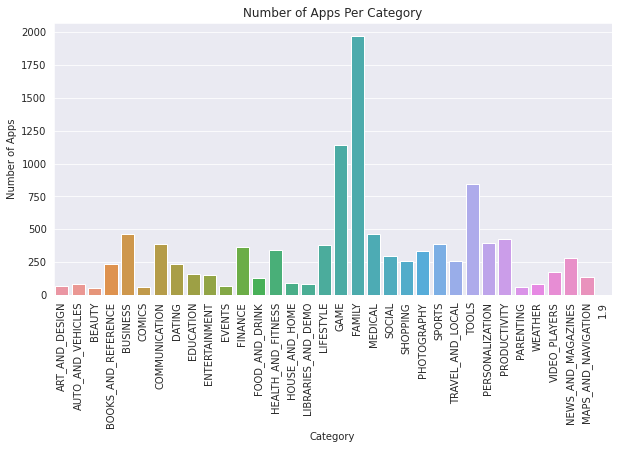

In [ ]:
#get the number of apps for each category
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df_playstore_data)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools

**Rating**

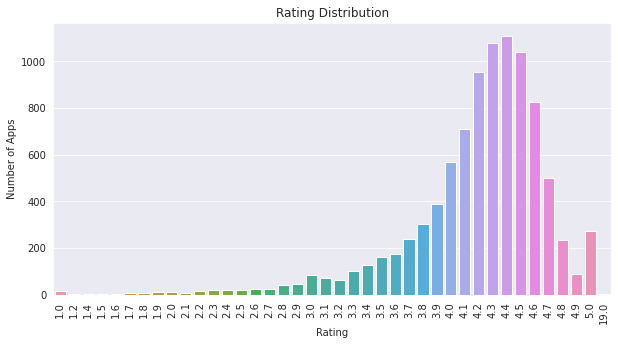

In [ ]:
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df_playstore_data)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()


From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7

**Application Type**

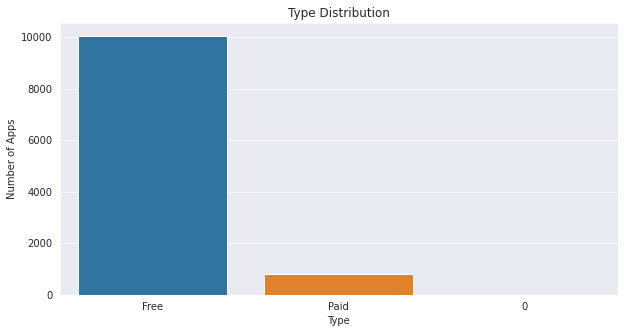

In [ ]:
# application type distribution
plt.figure(figsize=(10, 5))
sns.countplot(df_playstore_data['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

From the plot we can imply that majority of the apps in the Play Store are Free apps.

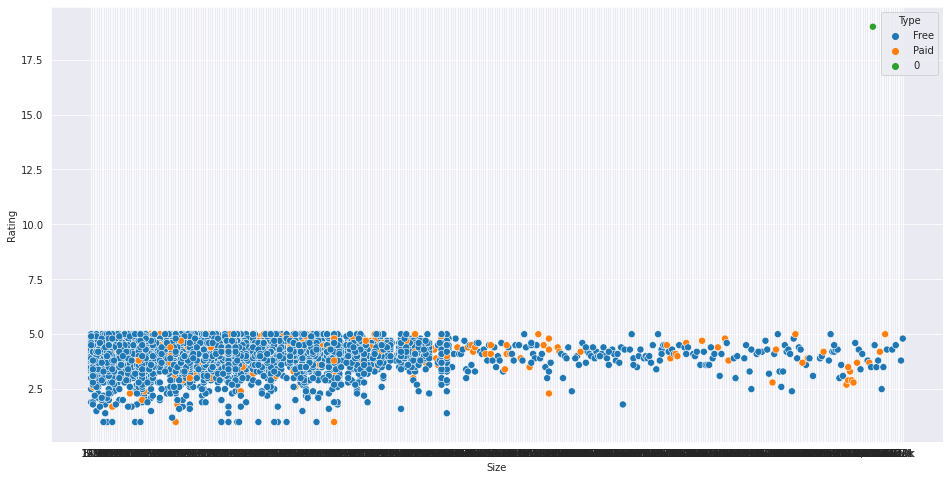

In [ ]:
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(16, 8))
sns.scatterplot(df_playstore_data['Size'],
               df_playstore_data['Rating'],
               hue=df_playstore_data['Type'],
               s=50)

From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating

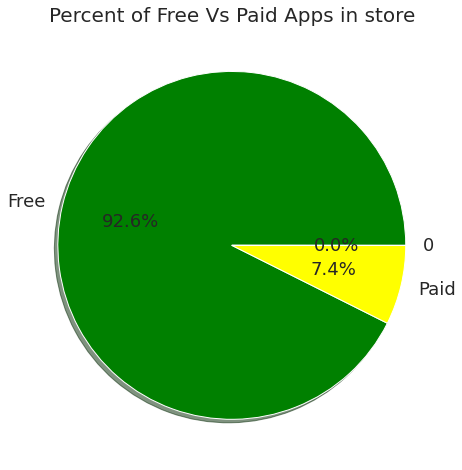

In [ ]:
plt.figure(figsize=(8,8))
labels = df_playstore_data['Type'].value_counts(sort = True).index
sizes = df_playstore_data['Type'].value_counts(sort = True)
colors = ["green","yellow"]
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0,textprops={'fontsize': 18})

plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

The above Pie-Chart represents percentage of Free apps are 92.6% and paid apps are 7.4% in dataset.

**Asking and Answering Questions**

---
**1.** What is the top 5 apps on the basis of installs?


---





In [8]:
df =df_playstore_data.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
474,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
3767,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,Varies with device,"500,000,000+",Free,0,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device
3574,Cloud Print,PRODUCTIVITY,4.1,282460,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"May 23, 2018",Varies with device,Varies with device


In [9]:
print(f'The 5 apps that have the most number of installs are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of installs are: Life Made WI-Fi Touchscreen Photo Frame, UC Browser - Fast Download Private & Secure, LINE: Free Calls & Messages, Flipboard: News For Our Time, Cloud Print




---
**2.** What is the top 5 reviewed apps?


---



In [10]:

df = df_playstore_data.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df = df.sort_values(by=['Reviews'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews
4018,GollerCepte Live Score,SPORTS,4.2,9992
401,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999
6714,SnipSnap Coupon App,SHOPPING,4.2,99759975
7441,US Open Tennis Championships 2018,SPORTS,4.0,99719971
2851,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971


In [11]:
print(f'The 5 apps that have the most number of total reviews are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of total reviews are: GollerCepte Live Score, Ad Block REMOVER - NEED ROOT, SnipSnap Coupon App, US Open Tennis Championships 2018, DreamTrips



---
**3.** What is the top 3 most installed apps in Game category?


---



In [14]:

df = df_playstore_data[df_playstore_data['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
4041,Temple Run 2,GAME,4.3,8116142,62M,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
